In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import os, shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,"//content//drive//MyDrive//Colab Notebooks//assignment//Train",str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10745, 30, 30, 3) (2687, 30, 30, 3) (10745,) (2687,)


In [3]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

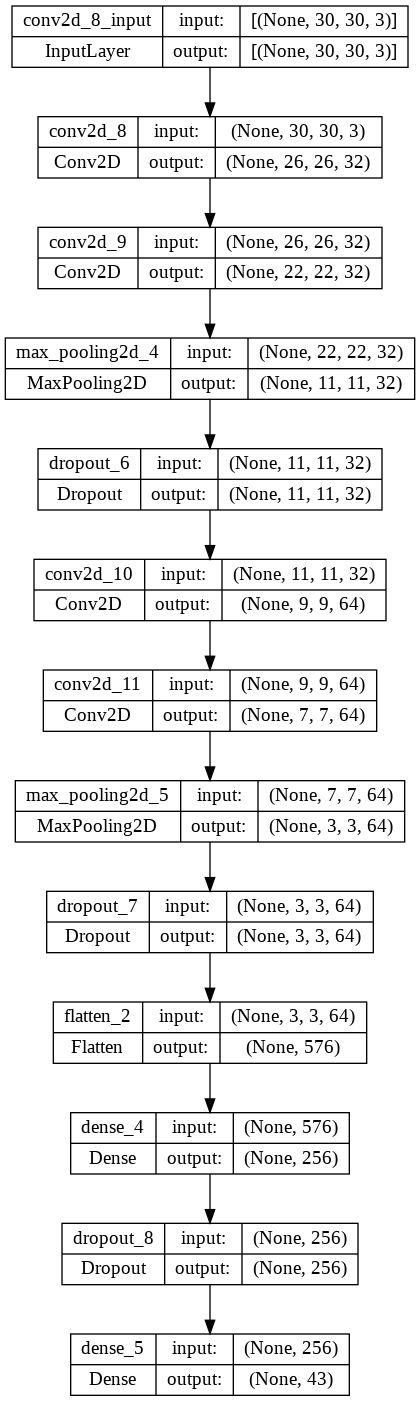

In [20]:
from keras.utils import  plot_model
plot_model(model, show_shapes=True)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

In [22]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=62, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
174/174 [==============================] - 53s 300ms/step - loss: 1.9627 - accuracy: 0.5109 - val_loss: 0.3557 - val_accuracy: 0.9300
Epoch 2/30
174/174 [==============================] - 53s 304ms/step - loss: 0.3647 - accuracy: 0.9006 - val_loss: 0.0930 - val_accuracy: 0.9803
Epoch 3/30
174/174 [==============================] - 53s 304ms/step - loss: 0.1963 - accuracy: 0.9461 - val_loss: 0.0448 - val_accuracy: 0.9907
Epoch 4/30
174/174 [==============================] - 51s 291ms/step - loss: 0.1250 - accuracy: 0.9675 - val_loss: 0.0184 - val_accuracy: 0.9959
Epoch 5/30
174/174 [==============================] - 51s 292ms/step - loss: 0.0894 - accuracy: 0.9754 - val_loss: 0.0108 - val_accuracy: 0.9974
Epoch 6/30
174/174 [==============================] - 48s 278ms/step - loss: 0.0742 - accuracy: 0.9789 - val_loss: 0.0202 - val_accuracy: 0.9944
Epoch 7/30
174/174 [==============================] - 53s 303ms/step - loss: 0.0749 - accuracy: 0.9799 - val_loss: 0.0295 - val_ac

In [23]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.962745,0.510935,0.355740,0.930034
1,0.364672,0.900605,0.093044,0.980275
2,0.196349,0.946114,0.044784,0.990696
3,0.125043,0.967520,0.018398,0.995906
4,0.089391,0.975430,0.010802,0.997395
5,0.074190,0.978874,0.020163,0.994418
6,0.074859,0.979898,0.029494,0.994045
7,0.102370,0.974686,0.012319,0.996651
8,0.078349,0.979991,0.009814,0.997023
9,0.068429,0.982690,0.015251,0.993673


In [24]:
model.save("//content//drive//MyDrive//Colab Notebooks//lab3//Saved model//my_model.h5")

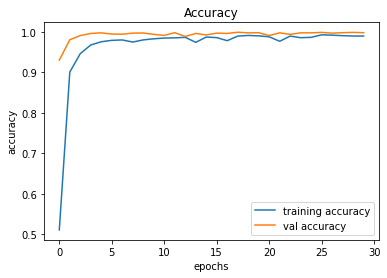

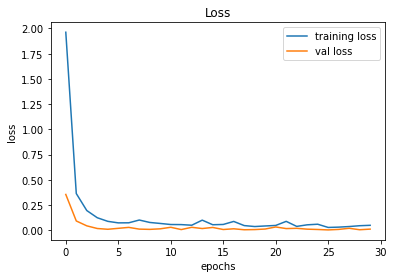

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()